In [2]:
import numpy as np
np.set_printoptions(precision=3, suppress=True)

import pandas as pd

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.12.0


In [3]:
df = pd.read_csv('archive/acs2015_census_tract_data.csv')
concat = False #change as needed
if concat:
    df = df.rename(columns={'CensusTract':'TractId'})
    newdf = pd.read_csv('archive/acs2017_census_tract_data.csv').rename(columns={'VotingAgeCitizen':'Citizen'})
    df = pd.concat([newdf, df])
df.head()

,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga,1948,940,1008,0.9,87.4,7.7,0.3,...,0.5,2.3,2.1,25.0,943,77.1,18.3,4.6,0.0,5.4
1,1001020200,Alabama,Autauga,2156,1059,1097,0.8,40.4,53.3,0.0,...,0.0,0.7,0.0,23.4,753,77.0,16.9,6.1,0.0,13.3
2,1001020300,Alabama,Autauga,2968,1364,1604,0.0,74.5,18.6,0.5,...,0.0,0.0,2.5,19.6,1373,64.1,23.6,12.3,0.0,6.2
3,1001020400,Alabama,Autauga,4423,2172,2251,10.5,82.8,3.7,1.6,...,0.0,2.6,1.6,25.3,1782,75.7,21.2,3.1,0.0,10.8
4,1001020500,Alabama,Autauga,10763,4922,5841,0.7,68.5,24.8,0.0,...,0.0,0.6,0.9,24.8,5037,67.1,27.6,5.3,0.0,4.2


In [4]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  # plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [IncomePerCap]')
  plt.legend()
  plt.grid(True)

In [5]:
df = df.dropna()
df = df[['TotalPop', 'Men', 'Women',
       'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen',
       'IncomePerCap',
       'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork']]
train_dataset = df.sample(frac=0.9, random_state=0)
test_dataset = df.drop(train_dataset.index)

train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('IncomePerCap')
test_labels = test_features.pop('IncomePerCap')

df.head()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,...,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork
0,1948,940,1008,0.9,87.4,7.7,0.3,0.6,0.0,1503,...,0.0,0.5,2.3,2.1,25.0,943,77.1,18.3,4.6,0.0
1,2156,1059,1097,0.8,40.4,53.3,0.0,2.3,0.0,1662,...,0.0,0.0,0.7,0.0,23.4,753,77.0,16.9,6.1,0.0
2,2968,1364,1604,0.0,74.5,18.6,0.5,1.4,0.3,2335,...,0.0,0.0,0.0,2.5,19.6,1373,64.1,23.6,12.3,0.0
3,4423,2172,2251,10.5,82.8,3.7,1.6,0.0,0.0,3306,...,0.0,0.0,2.6,1.6,25.3,1782,75.7,21.2,3.1,0.0
4,10763,4922,5841,0.7,68.5,24.8,0.0,3.8,0.0,7666,...,0.0,0.0,0.6,0.9,24.8,5037,67.1,27.6,5.3,0.0


In [6]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.asarray(train_features).astype('float32'))

In [7]:
ann_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=28, activation='relu'),
    # tf.keras.layers.Dense(units=14, activation='relu'),
    tf.keras.layers.Dense(units=7, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='linear')
])

Epoch 1/150
1179/1179 - 5s - loss: 81243680.0000 - val_loss: 48772696.0000 - 5s/epoch - 4ms/step
Epoch 2/150
1179/1179 - 3s - loss: 48452296.0000 - val_loss: 52037948.0000 - 3s/epoch - 3ms/step
Epoch 3/150
1179/1179 - 3s - loss: 46397564.0000 - val_loss: 44526424.0000 - 3s/epoch - 3ms/step
Epoch 4/150
1179/1179 - 4s - loss: 44445776.0000 - val_loss: 43796928.0000 - 4s/epoch - 3ms/step
Epoch 5/150
1179/1179 - 3s - loss: 43317748.0000 - val_loss: 52424120.0000 - 3s/epoch - 3ms/step
Epoch 6/150
1179/1179 - 3s - loss: 42431768.0000 - val_loss: 41207544.0000 - 3s/epoch - 2ms/step
Epoch 7/150
1179/1179 - 4s - loss: 41758604.0000 - val_loss: 41322952.0000 - 4s/epoch - 3ms/step
Epoch 8/150
1179/1179 - 3s - loss: 40596292.0000 - val_loss: 44070684.0000 - 3s/epoch - 3ms/step
Epoch 9/150
1179/1179 - 4s - loss: 40599876.0000 - val_loss: 40598680.0000 - 4s/epoch - 4ms/step
Epoch 10/150
1179/1179 - 3s - loss: 40000348.0000 - val_loss: 43980572.0000 - 3s/epoch - 3ms/step
Epoch 11/150
1179/1179 - 3s -

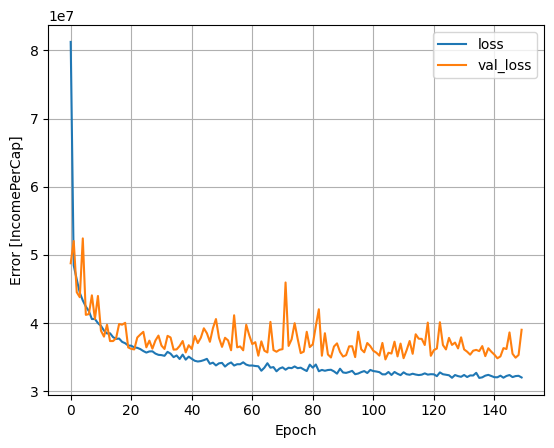

In [8]:
ann_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_squared_error'
    )

history = ann_model.fit(
    train_features,
    train_labels,
    epochs=150,
    batch_size=50,
    validation_split=0.1,
    verbose=2
)
plot_loss(history)

RESULTS:

-----------------------------------------

Using just 2015 data

1 layer  : 34435316.0000 MSE

2 layers : 32542424.0000 MSE (28, 14, 1)

2 layers : 31465028.0000 MSE (28,  7, 1)

3 layers : 33440750.0000 MSE

------------------------------------------

Using 2015 + 2017 data

1 layer  : 49900776.0000 MSE

2 layers : 36901260.0000 MSE (28, 14, 1)

2 layers : 37744916.0000 MSE (28,  7, 1)

3 layers : 40632372.0000 MSE

-----------------------------------------

Now how does the best model trained on 2015 data perform on the 2017 data?

In [9]:
newdf = pd.read_csv('archive/acs2017_census_tract_data.csv').rename(columns={'VotingAgeCitizen':'Citizen'})

In [10]:
def mse(y, y_prime, ignore_size_mismatch=False):
    if (len(y) != len(y_prime)) and not ignore_size_mismatch:
        print(len(y), len(y_prime))
        raise ValueError("Mismatched lengths")
    sum = 0
    for i in range(min(len(y), len(y_prime))):
        sum += (y[i] - y_prime[i])*(y[i] - y_prime[i])
    return (sum/min(len(y), len(y_prime)))[0]

In [11]:
y_prime = ann_model.predict(newdf[['TotalPop', 'Men', 'Women',
       'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen',
       'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork']].dropna())
y = newdf['IncomePerCap'].dropna().to_numpy()
# print("Y:",y,"\nY':", y_prime)
# print(y.shape, y_prime.shape)
mse(y, y_prime, ignore_size_mismatch=True)

2283/2283 [==============================] - 8s 3ms/step


378935453.6764867

Decent! But still significantly worse than on the original dataset.

So where is the error the highest when using the old data to predict the new? Why?

In [12]:
from queue import PriorityQueue

def get_n_highest_error(df, model, n):
   y_prime = model.predict(df[['TotalPop', 'Men', 'Women',
       'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen',
       'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork']].dropna())
   y = df['IncomePerCap'].dropna().to_numpy()
   error_q = PriorityQueue()
   for i in range(min(len(y), len(y_prime))):
      error = (y[i] - y_prime[i])*(y[i] - y_prime[i])
      error_q.put((error, i))
   max_error_rows = []
   for _ in range(n):
      max_error_rows.append(df.iloc[error_q.get()[1]])
   return pd.DataFrame(max_error_rows)


In [13]:
max_error_df = get_n_highest_error(df=newdf, model=ann_model, n=len(newdf)//4) #look at the top quarter most poorly predicted values
# print(max_error_df.head(10))
max_error_df_desc = max_error_df.describe()
newdf_desc = newdf.describe()
df_desc = df.describe()

2283/2283 [==============================] - 7s 3ms/step


But first, how does the 2017 data differ from the 2015 data?

In [14]:
df_minus_newdf = 100*(df_desc - newdf_desc)/(df_desc)
print("Percent change in value from 2015 to 2017")
df_minus_newdf.iloc[1]

Percent change in value from 2015 to 2017


Asian             -3.574975
Black             -0.374849
Carpool            3.414935
ChildPoverty            NaN
Citizen           -0.728458
Construction       0.785187
Drive              0.017708
Employed          -1.677136
FamilyWork        -0.622012
Hispanic          -2.330014
Income                  NaN
IncomeErr               NaN
IncomePerCap      -7.471870
IncomePerCapErr         NaN
MeanCommute       -1.426809
Men               -0.178896
Native            -1.533357
Office             2.083557
OtherTransp       -0.756946
Pacific           -2.487061
Poverty                 NaN
PrivateWork       -0.617113
Production        -0.112546
Professional      -2.183607
PublicWork         2.990662
SelfEmployed       0.838041
Service            1.061951
TotalPop          -0.026505
TractId                 NaN
Transit            0.836002
Unemployment            NaN
Walk              -1.152718
White              1.216423
Women              0.120703
WorkAtHome        -7.845344
Name: mean, dtype: f

Answer: They don't seem to differ too much - the largest differences are income per capita and the percentage of people working at home.

Now, let's see how the rows our 2015 model struggled with differ from the rest of the 2017 dataset.

In [15]:
error_minus_newdf = 100*(max_error_df_desc - newdf_desc)/(newdf_desc)
error_minus_newdf.iloc[1]

TractId            -5.126066
TotalPop           -0.095182
Men                -0.073815
Women              -0.115885
Hispanic           -8.646638
White               1.836139
Black               4.520187
Native             15.701823
Asian              -7.508631
Pacific             3.629341
Citizen            -0.066504
Income             -1.933477
IncomeErr          -2.007968
IncomePerCap       -2.293444
IncomePerCapErr    -2.454678
Poverty             0.187865
ChildPoverty        0.949416
Professional       -2.090230
Service            -0.348051
Office             -0.231473
Construction        2.306312
Production          5.034000
Drive               1.032715
Carpool             1.563397
Transit           -11.525867
Walk               -5.468805
OtherTransp        -2.333750
WorkAtHome         -2.036524
MeanCommute        -1.011118
Employed           -0.402619
PrivateWork         0.223898
PublicWork         -0.736945
SelfEmployed       -1.269197
FamilyWork          2.951608
Unemployment  

In [16]:
state_df = pd.DataFrame(max_error_df.groupby('State').count()['TractId']/newdf.groupby('State').count()['TractId']).rename(columns={'TractId':'PercentageInHighErrorData'})
print(state_df.sort_values(by='PercentageInHighErrorData',ascending=False).head(10))

              PercentageInHighErrorData
State                                  
Alabama                        0.729890
Wyoming                        0.484848
Arizona                        0.395806
South Dakota                   0.387387
Mississippi                    0.384036
Arkansas                       0.374636
Wisconsin                      0.343506
Hawaii                         0.324786
Rhode Island                   0.319672
Indiana                        0.307743


Another way to see this...

In [17]:
import plotly.express as px
statenames_to_codes = pd.read_csv('archive/statenamestocodes.csv')
tmp = pd.merge(state_df, statenames_to_codes, on="State")
fig = px.choropleth(tmp,
                    locations='Abbreviation', 
                    locationmode="USA-states", 
                    color='PercentageInHighErrorData',
                    color_continuous_scale="Viridis_r", 
                    scope="usa")
fig.show()

What on earth is up with Alabama?

In [18]:
df = pd.read_csv('archive/acs2015_census_tract_data.csv')
newdf = pd.read_csv('archive/acs2017_census_tract_data.csv').rename(columns={'VotingAgeCitizen':'Citizen'})

alabama_2015 = df[df['State']=='Alabama']
alabama_2017 = newdf[newdf['State']=='Alabama']

print((100*(alabama_2017.describe()-alabama_2015.describe())/alabama_2015.describe()).iloc[1,:])

Asian               2.226540
Black               1.134586
Carpool            -6.568011
CensusTract              NaN
ChildPoverty       -4.310358
Citizen             0.853909
Construction       -1.025833
Drive               0.611688
Employed            1.640884
FamilyWork          1.654646
Hispanic            2.540855
Income              6.101793
IncomeErr           7.908944
IncomePerCap        6.847178
IncomePerCapErr    10.717739
MeanCommute         1.013335
Men                 0.414892
Native             -0.262664
Office             -1.555397
OtherTransp         0.812540
Pacific           -16.336634
Poverty            -4.123328
PrivateWork         1.132186
Production          0.808438
Professional        1.618858
PublicWork         -4.967478
SelfEmployed       -1.577517
Service            -0.863786
TotalPop            0.417151
TractId                  NaN
Transit            -5.599436
Unemployment      -19.043713
Walk               -0.930205
White              -0.931712
Women         

Hard to say from this data: It might just be a matter of shifting income and poverty with otherwise consistent demographics.

Let's try the second-most problematic state, Wyoming.

In [19]:
wyoming_2015 = df[df['State']=='Wyoming']
wyoming_2017 = newdf[newdf['State']=='Wyoming']

print((100*(wyoming_2017.describe()-wyoming_2015.describe())/wyoming_2015.describe()).iloc[1,:])

Asian              -2.815700
Black              -5.604076
Carpool            -8.387405
CensusTract              NaN
ChildPoverty      -15.231241
Citizen             0.648333
Construction       -4.343320
Drive               1.429288
Employed           -0.107502
FamilyWork          6.896552
Hispanic            0.102580
Income              3.403878
IncomeErr           7.596455
IncomePerCap        4.949291
IncomePerCapErr    10.537099
MeanCommute        -1.801132
Men                 0.927051
Native              6.562500
Office             -3.024348
OtherTransp        -8.749122
Pacific            -2.127660
Poverty            -4.730023
PrivateWork         0.325680
Production          1.646065
Professional        2.757133
PublicWork         -1.237263
SelfEmployed        0.263429
Service             1.334764
TotalPop            0.607405
TractId                  NaN
Transit           -15.675116
Unemployment       -5.016229
Walk                2.665951
White               0.017214
Women         

There doesn't appear to be much similarity here, but Wyoming is a very underpopulated state so it would make sense that the model might struggle because it might be more quirky in its demographics and easily swayed.

In sum, a neural net performs very well with this dataset. Simpler seems to be better - both because of data and because of the relationships between features and the label. 

There is something odd however about Alabama across the time between 2015 and 2017, and it would be interesting to continue exploring that.